In [77]:
# import required libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import matplotlib_inline
from matplotlib import cm
import matplotlib_inline
import seaborn as sns
from matplotlib.font_manager import FontProperties
from matplotlib import image
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [4]:
df = pd.read_csv("merged_match_results.csv")
all_xg_for = pd.concat([df['home_np_xg'], df['away_np_xg']])
all_xg_against = pd.concat([df['away_np_xg'], df['home_np_xg']])

In [3]:
df.head()

,wk,date,time,home,homegoals,away,awaygoals,home_xg,away_xg,home_pen_xg,away_pen_xg,home_np_xg,away_np_xg
0,1,2021-04-10,15:00,Malmö FF,3,Hammarby,2,3.081973,0.284890,0.725091,0.0,2.356882,0.284890
1,1,2021-04-10,17:30,Örebro,0,IFK Göteborg,0,0.630045,0.747871,0.000000,0.0,0.630045,0.747871
2,1,2021-04-11,15:00,Halmstad,1,BK Häcken,0,1.014930,0.405163,0.000000,0.0,1.014930,0.405163
3,1,2021-04-11,15:00,Mjällby AIF,0,Varbergs BoIS FC,0,1.517195,0.707990,0.000000,0.0,1.517195,0.707990
4,1,2021-04-11,17:30,IF Elfsborg,0,Djurgården,2,0.841527,0.221132,0.000000,0.0,0.841527,0.221132


In [5]:
team_color = {'Malmö FF':['skyblue', 'white'], 
              'AIK':['darkblue', 'yellow'],  
              'Djurgården':['skyblue', 'darkblue'], 
              'IF Elfsborg':['yellow', 'black'], 
              'Hammarby':['white', 'darkgreen'],
              'Kalmar FF':['red', 'white'], 
              'IFK Norrköping FK':['white', 'blue'], 
              'IFK Göteborg':['blue', 'skyblue'], 
              'Mjällby AIF':['#FCDF51', 'black'],
              'Varbergs BoIS FC':['#53B663', 'black'], 
              'IK Sirius FK':['blue', 'black'], 
              'BK Häcken':['black', '#FFF275'], 
              'Degerfors IF':['white', 'red'],
              'Halmstad':['#6B91EB', 'black'], 
              'Örebro':['white', 'black'], 
              'Östersund':['red', 'black']}

In [6]:
team_ranks = ['Malmö FF', 'AIK', 'Djurgården', 'IF Elfsborg', 'Hammarby',
'Kalmar FF', 'IFK Norrköping FK', 'IFK Göteborg', 'Mjällby AIF',
'Varbergs BoIS FC', 'IK Sirius FK', 'BK Häcken', 'Degerfors IF',
'Halmstad', 'Örebro', 'Östersund']

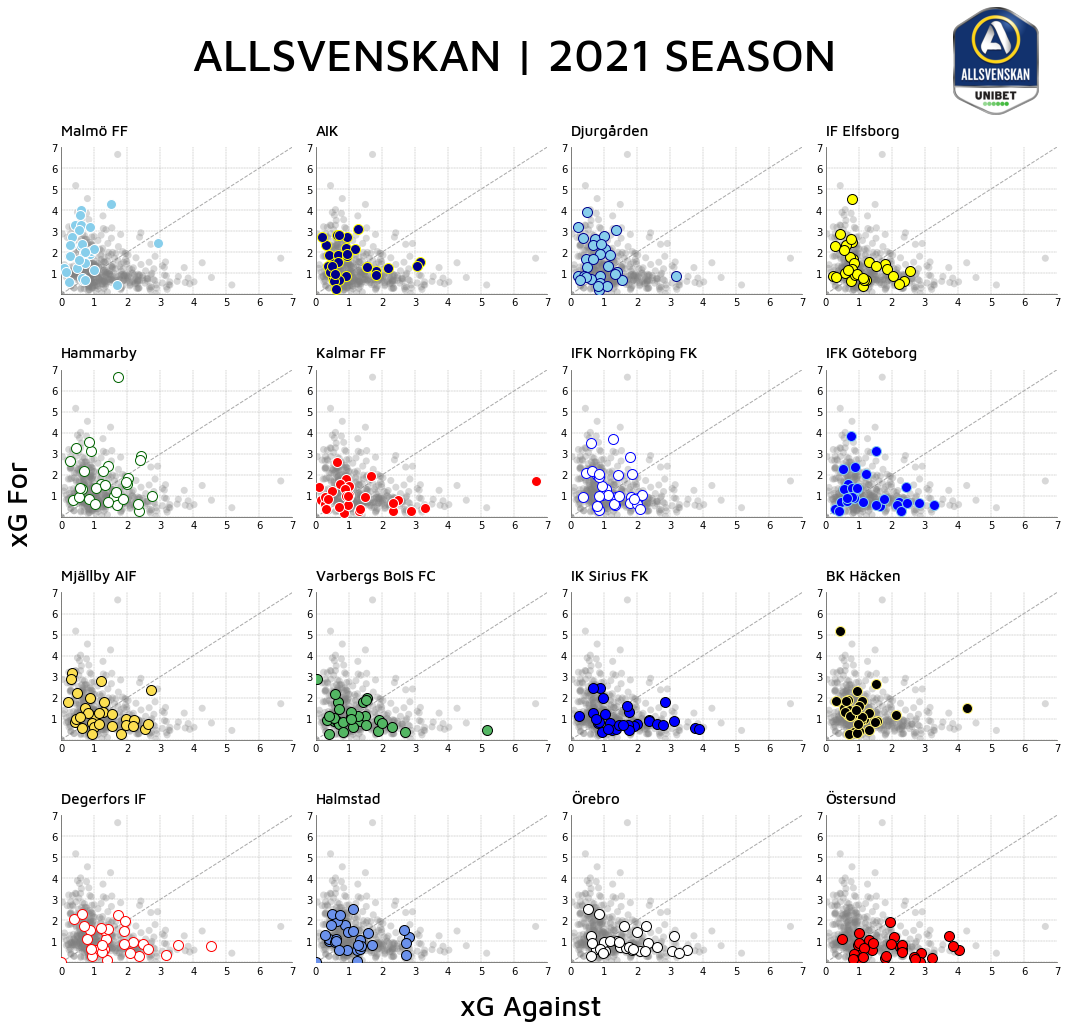

In [140]:
# list of club logo paths to iterate over 
files = os.listdir('club_logos/')

# image settings:
# image coordinates (origin to reassign to initial) and xy to reassign after each iteration
origin_xy = np.array([0.025, 0.8, 0.04, 0.04])
xy = np.array([0.025, 0.8, 0.04, 0.04])
# steps for coordinates
dx = np.array([0.25])
dy = np.array([-0.265, -0.265, -0.263, -0.25 ])


fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (15, 15))

fig.set_facecolor("white")
#EFEFF0
#FDFFEE

# Font Properties:
# (x, y) axis labels
label_fps = FontProperties(family = 'Maven Pro', size = 28, weight = 'medium')
# each plot title
ax_fps = FontProperties(family = 'Maven Pro', size = 15, weight = 'medium')
# figure title
fig_fps = FontProperties(family = 'Maven Pro', size = 45, weight = 'medium')


ind = 0
for i in range(4):
    for j in range(4):
        
        # import image
        im = image.imread("club_logos/" + files[ind])
        
        # grid settings
        ax[i, j].grid(color='#62625F', ls = '-.', lw = 0.25, zorder = 0)

        # face color of axis and figure
        ax[i, j].set_facecolor("white")
        
        # plot dashed line 
        x = np.array([0, 7])
        y = np.array([0, 7])
        ax[i, j].plot(x, y, c = 'darkgray', ls = '--', lw = 1, zorder = 3)

        # data filtering steps: 
        # 1.take a team from a list and filter data frame 'team_df'
        team_df = df[(df['home'] == team_ranks[ind]) | (df['away'] == team_ranks[ind])]
        
        # 2. filter non-penalty xG for
        team_df[team_df['home'] == team_ranks[ind]]['home_np_xg']
        team_df[team_df['away'] == team_ranks[ind]]['away_np_xg']
        xg_for = pd.concat([team_df[team_df['home'] == team_ranks[ind]]['home_np_xg'],
                 team_df[team_df['away'] == team_ranks[ind]]['away_np_xg']])
        
        # 3. filter non-penalty xG against
        team_df[team_df['home'] == team_ranks[ind]]['away_np_xg']
        team_df[team_df['away'] == team_ranks[ind]]['home_np_xg']
        xg_against = pd.concat([team_df[team_df['home'] == team_ranks[ind]]['away_np_xg'], 
                     team_df[team_df['away'] == team_ranks[ind]]['home_np_xg']])

        
        ax[i, j].scatter(all_xg_against, all_xg_for, c = 'gray', alpha = 0.3, s = 50, edgecolor = 'none', zorder = 3)
        ax[i, j].scatter(xg_against, xg_for, s = 100, c = team_color[team_ranks[ind]][0], 
                         edgecolor = team_color[team_ranks[ind]][1], zorder = 3)

        # set limit for x and y axis
        ax[i, j].set_xlim(0, 7)
        ax[i, j].set_ylim(0, 7)
        ax[i, j].set_xticks(np.arange(0, 8, 1))
        ax[i, j].set_xticks(np.arange(0, 8, 1))
        
        # remove tick lines from both axis
        #ax[i, j].xaxis.set_tick_params(length = 0)
        #ax[i, j].yaxis.set_tick_params(length = 0)
        ax[i, j].tick_params(length = 0)

        # remove '0' on y-axis
        ax[i, j].yaxis.get_major_ticks()[0].label1.set_visible(False)
        
        # remove top and right spines
        ax[i, j].spines[['top', 'right']].set_visible(False)
        
        # spines color
        spines_color = '#62625F'
        ax[i, j].spines['bottom'].set_color(spines_color)
        ax[i, j].spines['top'].set_color(spines_color) 
        ax[i, j].spines['right'].set_color(spines_color)
        ax[i, j].spines['left'].set_color(spines_color)
        
        # ticks color
        #ax[i, j].tick_params(colors = spines_color, which = 'both')

        # font dictionary
        font3 = {'family': 'monospace', 'weight': 'bold', 'size': 14}
        
        # 'x' and 'y' axis labels
        #ax[i, j].set_xlabel('xG Against')
        #ax[i, j].set_ylabel('xG')
        
        # title for each plot
        ax[i, j].set_title(team_ranks[ind], loc = 'left', pad = 12, fontproperties = ax_fps)
        #ax[i, j].xaxis.label.set_color(spines_color)
        #ax[i, j].yaxis.label.set_color(spines_color)
        
        # remove topmost and rightmost gridlines:
        # retrieve all x and y gridlines
        y_gridlines = ax[i, j].get_ygridlines()
        x_gridlines = ax[i, j].get_xgridlines()
        # select topmost and rightmost and remove them
        y_last = y_gridlines[-1]
        y_last.set_visible(False)
        x_last = x_gridlines[-1]
        x_last.set_visible(False)
        
        # image settings:
        # add axis (x, y, width, height)
        #imax = fig.add_axes(xy)
        # remove ticks & the box from imax 
        #imax.set_axis_off()
        # print the logo with aspect="equal" to avoid distorting the logo
        #imax.imshow(im, aspect = "equal")

        
        # update index for a list of teams
        ind = ind + 1
        
        # reassign step for image coordinate
        xy[0] = xy[0] + dx
        
    # reassign step for image coordinate
    xy[0] = origin_xy[0]
    xy[1] = xy[1] + dy[i]
        

# league logo
league_img = image.imread("allsvenskan.png")
league_logo = fig.add_axes([0.88, 0.86, 0.1, 0.1])
league_logo.set_axis_off()
league_logo.imshow(league_img, aspect = "equal")        

# figure title and labels
fig.supxlabel('xG Against', fontproperties = label_fps, y = 0.02)
fig.supylabel('xG For', fontproperties = label_fps, x = 0.015)
fig.suptitle('ALLSVENSKAN | 2021 SEASON', x = 0.485, y = 0.93, fontproperties = fig_fps)

# adjust horizontal spacing between plots
fig.tight_layout(h_pad = 5)
# create a space for a title
fig.subplots_adjust(left = 0.065, top = 0.83, bottom = 0.075)
fig.show()

# save figure
fig.savefig('xg_subplots.png', dpi = 300, transparent = False)

In [ ]:
x  = 0.2, y  = 1.2, 

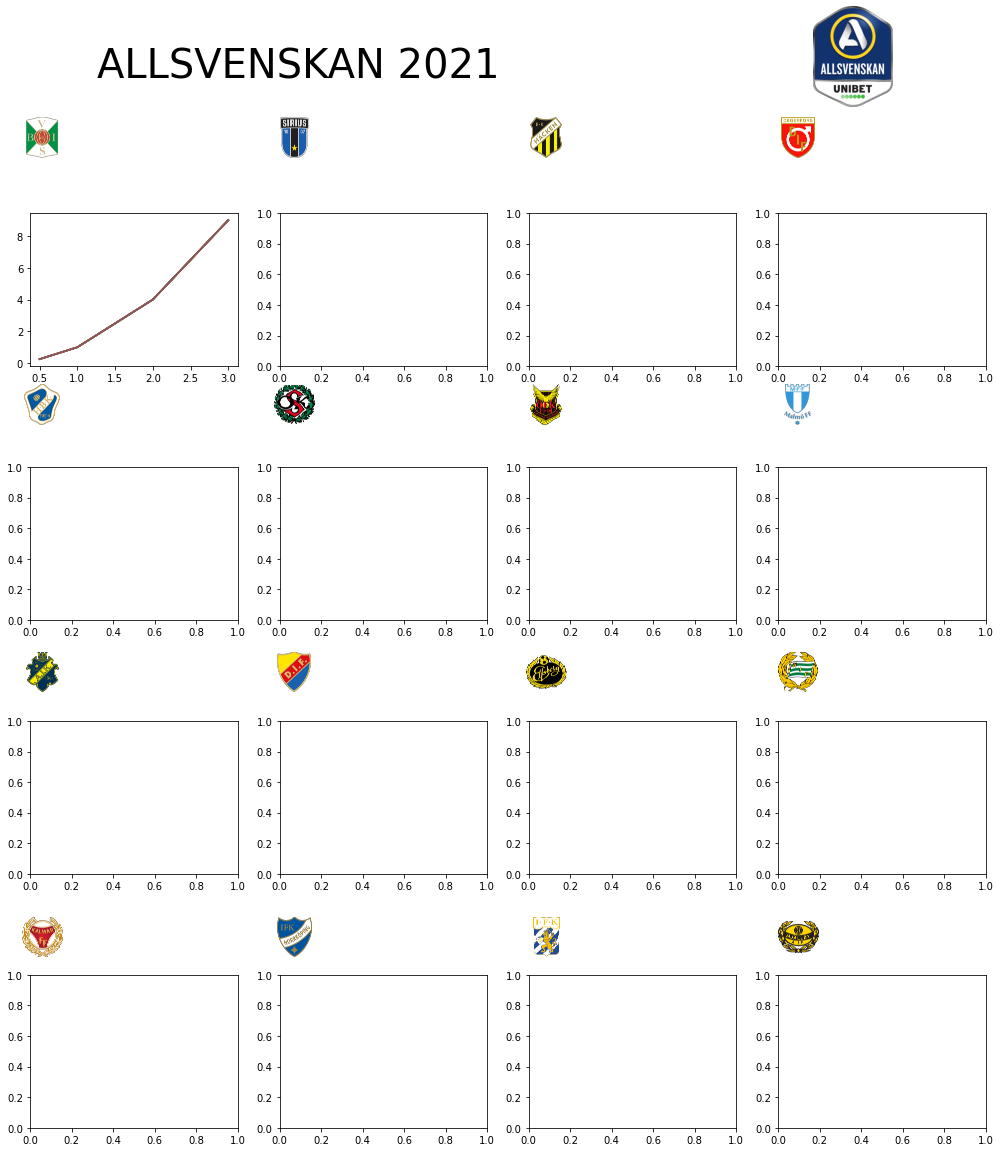

In [48]:
# list of club logo paths to iterate over 
files = os.listdir('club_logos/')

fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (14, 14))


# image settings:
# image coordinates (origin to reassign to initial) and xy to reassign after each iteration
origin_xy = np.array([0.025, 0.99, 0.04, 0.04])
xy = np.array([0.025, 0.99, 0.04, 0.04])
# steps for coordinates
dx = np.array([0.25])
dy = np.array([-0.265, -0.265, -0.263, -0.25 ])

files = os.listdir('club_logos/')
ind = 0
for i in range(4):
    for j in range(4):
        
        #ax[i, j].set_facecolor('black')
        
        # import image
        im = image.imread("club_logos/" + files[ind])
        
        # plotting data
        x = np.array([0.5, 1, 2, 3])
        y = x**2
        ax[0, 0].plot(x, y)

        # face colors
        fig.set_facecolor('white')
        ax[0, 0].set_facecolor('white')

        # image settings:
        # add axis (x, y, width, height)
        imax = fig.add_axes(xy)
        # remove ticks & the box from imax 
        imax.set_axis_off()
        # print the logo with aspect="equal" to avoid distorting the logo
        imax.imshow(im, aspect = "equal")

        # reassign step for image coordinate
        xy[0] = xy[0] + dx
        
        # index
        ind = ind + 1
        
    # reassign step for image coordinate
    xy[0] = origin_xy[0]
    xy[1] = xy[1] + dy[i]

#fig.set_facecolor("black")



fig.suptitle('ALLSVENSKAN 2021', x = 0.3, y = 1.1, fontsize = 40)
    
# set 'h_pad' for horizontal spacing between subplots
plt.tight_layout(h_pad = 8)
plt.show()

# save figure
fig.savefig('test.png', dpi = 300, transparent = False, bbox_inches='tight')